<a href="https://colab.research.google.com/github/MarconeRafael/Classificacao_de_Imagens_TensorFlow_e_MNIST/blob/main/Classifica%C3%A7%C3%A3o_de_Imagens_TensorFlow_e_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os Pacotes Necessários

Começamos importando os pacotes necessários para desenvolver nossa modelo para classificação de imagens

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Importando os dados MNIST

O conjunto de dados MNIST é um conjunto de imagens de dígitos escritos à mão, amplamente utilizado para testar algoritmos de aprendizado de máquina. Vamos importar o conjunto de dados MNIST do TensorFlow.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


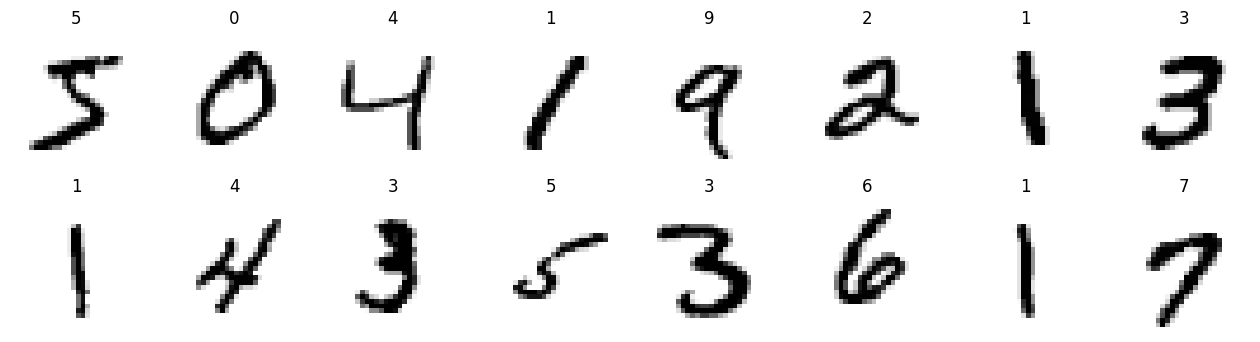

In [3]:
linhas  = 2
colunas = 8

fig, axs = plt.subplots(linhas, colunas, figsize=(16, 4))
axs      = axs.flatten()

for i in range(linhas * colunas):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].set_title(str(y_train[i]))
    axs[i].axis('off')

plt.show()

O conjunto de dados MNIST é composto por imagens de 28x28 pixels e cada imagem representa um dígito de 0 a 9. As imagens são divididas em um conjunto de treinamento e um conjunto de teste.

# Pré-processando os dados
Antes de alimentar os dados para o modelo, é necessário pré-processá-los. Vamos normalizar as imagens dividindo cada pixel pelo valor máximo de pixel (255).

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definindo o modelo
Agora que os dados estão prontos, vamos definir o modelo. Para este tutorial, vamos usar uma rede neural simples com duas camadas ocultas e uma camada de saída.

In [5]:
# modelo_1 = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])
modelo_1 = tf.keras.models.Sequential()
modelo_1.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
modelo_1.add(tf.keras.layers.Dense(10, activation='softmax'))

A primeira camada é uma camada de achatamento (flatten), que transforma a imagem em um vetor unidimensional. As duas camadas ocultas têm 128 e 64 neurônios, respectivamente, e usam a função de ativação ReLU. A última camada é uma camada de saída com 10 neurônios (um para cada classe) e não usa função de ativação.

# Compilando o modelo
Antes de treinar o modelo, precisamos compilá-lo. Vamos especificar a função de perda (sparse_categorical_crossentropy), o otimizador (adam) e as métricas (accuracy).

In [6]:
modelo_1.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinando o modelo
Agora que o modelo está compilado, vamos treiná-lo no conjunto de treinamento.

In [7]:
history_m1 = modelo_1.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=64)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 4s 3ms/step - loss: 1.0015 - accuracy: 0.7660 - val_loss: 0.6047 - val_accuracy: 0.8645
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.8648 - val_loss: 0.4779 - val_accuracy: 0.8836
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4739 - accuracy: 0.8781 - val_loss: 0.4269 - val_accuracy: 0.8895
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4346 - accuracy: 0.8853 - val_loss: 0.3980 - val_accuracy: 0.8960
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4102 - accuracy: 0.8895 - val_loss: 0.3796 - val_accuracy: 0.8997
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3933 - accuracy: 0.8936 - val_loss: 0.3658 - val_accuracy: 0.9015
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3805 - accuracy: 0.8964 - val_loss: 0.3564 - val_accuracy: 0.9042
Epoch 8/10
938/93

Durante o treinamento, o modelo é ajustado para minimizar a função de perda e melhorar a acurácia. O argumento epochs especifica o número de épocas (iterações) de treinamento.

# Visualizando os resultados
Podemos visualizar os resultados do treinamento usando o histórico de treinamento (history).

In [8]:
def plot_resultados_modelo(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Acurácia Treinamento', marker='o', color='blue')
  ax[0].plot(history.history['val_accuracy'], label='Acurácia Validação', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Loss Treinamento', marker='o', color='blue')
  ax[1].plot(history.history['val_loss'], label='Loss Validação', marker='o', color='red', linestyle='--')

  for _ in range(2):
      ax[_].set_xlabel('Época')
      ax[_].set_ylabel('Acurácia' if _ == 0 else 'Loss')
      ax[_].legend()
      ax[_].grid(True, linestyle=':')



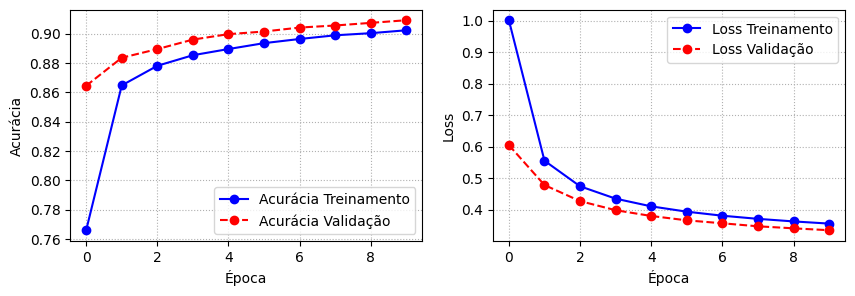

In [9]:
plot_resultados_modelo(history_m1)

# Adicionando Mais Camadas

Para melhorar a precisão do reconhecimento, adicionaremos mais camadas à rede neural.
<p align="center">
<img src="https://codelabs.developers.google.com/static/codelabs/cloud-tensorflow-mnist/img/a01d1ffdc3c7aa7d_1440.png" alt= “” width="500" height="value">
</p>
Mantemos softmax como a função de ativação na última camada porque é o que funciona melhor para a classificação. Nas camadas intermediárias, porém, usaremos a função de ativação mais clássica: o sigmóide:


<p align="center">
<img src="https://codelabs.developers.google.com/static/codelabs/cloud-tensorflow-mnist/img/41fc82288c4aff5d_1440.png" alt= “” width="300" height="value">
</p>




In [10]:
modelo_2 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28, 1,)),
      tf.keras.layers.Dense(200, activation='sigmoid'),
      tf.keras.layers.Dense(60, activation='sigmoid'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

modelo_2.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history_m2 = modelo_2.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test), batch_size=64,
                          verbose=2)

Epoch 1/10
938/938 - 5s - loss: 2.2577 - accuracy: 0.2512 - val_loss: 2.1963 - val_accuracy: 0.5024 - 5s/epoch - 6ms/step
Epoch 2/10
938/938 - 3s - loss: 2.1147 - accuracy: 0.5182 - val_loss: 2.0033 - val_accuracy: 0.5788 - 3s/epoch - 3ms/step
Epoch 3/10
938/938 - 4s - loss: 1.8466 - accuracy: 0.6032 - val_loss: 1.6561 - val_accuracy: 0.6633 - 4s/epoch - 4ms/step
Epoch 4/10
938/938 - 4s - loss: 1.4798 - accuracy: 0.6738 - val_loss: 1.3013 - val_accuracy: 0.7240 - 4s/epoch - 4ms/step
Epoch 5/10
938/938 - 4s - loss: 1.1738 - accuracy: 0.7334 - val_loss: 1.0430 - val_accuracy: 0.7635 - 4s/epoch - 5ms/step
Epoch 6/10
938/938 - 3s - loss: 0.9608 - accuracy: 0.7753 - val_loss: 0.8684 - val_accuracy: 0.7926 - 3s/epoch - 4ms/step
Epoch 7/10
938/938 - 4s - loss: 0.8153 - accuracy: 0.8036 - val_loss: 0.7467 - val_accuracy: 0.8190 - 4s/epoch - 4ms/step
Epoch 8/10
938/938 - 5s - loss: 0.7144 - accuracy: 0.8232 - val_loss: 0.6617 - val_accuracy: 0.8364 - 5s/epoch - 6ms/step
Epoch 9/10
938/938 - 5s 

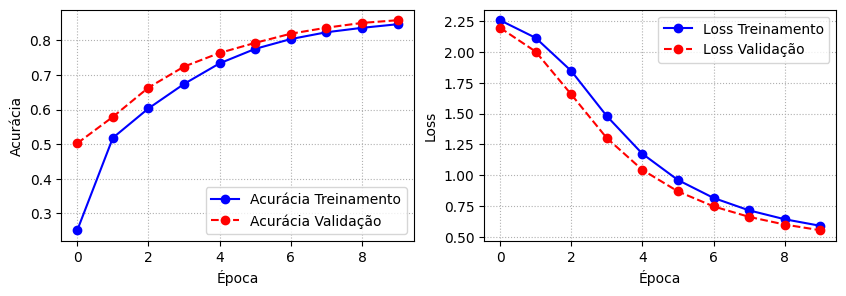

In [12]:
plot_resultados_modelo(history_m2)

# Ativação ReLu

A função de ativação sigmoide é bastante problemática em redes profundas. Ele esmaga todos os valores entre 0 e 1 e, quando você faz isso repetidamente, as saídas dos neurônios e seus gradientes podem desaparecer completamente. Foi mencionado por razões históricas, mas as redes modernas usam a RELU (Unidade Linear Retificada) que se parece com isso:

<p align="center">
<img src="https://codelabs.developers.google.com/static/codelabs/cloud-tensorflow-mnist/img/1abce89f7143a69c_1440.png" alt= “” width="300" height="value">
</p>



In [13]:
modelo_3 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28, 1,)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

modelo_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history_m3 = modelo_3.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=64, verbose=2)

Epoch 1/10
938/938 - 6s - loss: 0.2519 - accuracy: 0.9272 - val_loss: 0.1303 - val_accuracy: 0.9589 - 6s/epoch - 6ms/step
Epoch 2/10
938/938 - 5s - loss: 0.0990 - accuracy: 0.9699 - val_loss: 0.0872 - val_accuracy: 0.9748 - 5s/epoch - 5ms/step
Epoch 3/10
938/938 - 5s - loss: 0.0675 - accuracy: 0.9794 - val_loss: 0.0819 - val_accuracy: 0.9740 - 5s/epoch - 6ms/step
Epoch 4/10
938/938 - 6s - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0941 - val_accuracy: 0.9713 - 6s/epoch - 6ms/step
Epoch 5/10
938/938 - 4s - loss: 0.0394 - accuracy: 0.9870 - val_loss: 0.0782 - val_accuracy: 0.9752 - 4s/epoch - 5ms/step
Epoch 6/10
938/938 - 5s - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0829 - val_accuracy: 0.9785 - 5s/epoch - 5ms/step
Epoch 7/10
938/938 - 5s - loss: 0.0238 - accuracy: 0.9920 - val_loss: 0.0783 - val_accuracy: 0.9771 - 5s/epoch - 5ms/step
Epoch 8/10
938/938 - 4s - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.1019 - val_accuracy: 0.9738 - 4s/epoch - 4ms/step
Epoch 9/10
938/938 - 5s 

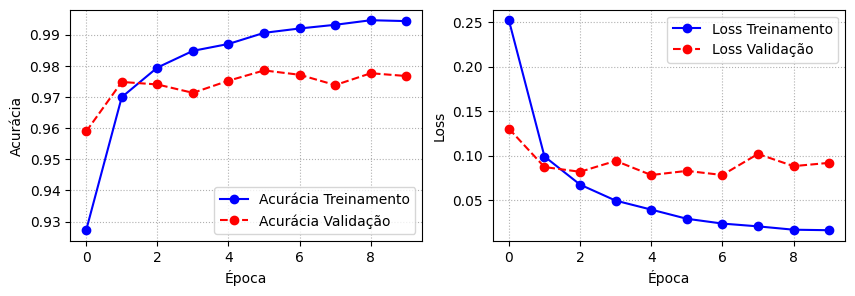

In [15]:
plot_resultados_modelo(history_m3)

# Utilizando CNNs

As redes neurais convolucionais aplicam uma série de filtros que podem ser aprendidos à imagem de entrada. Uma camada convolucional é definida pelo tamanho do filtro (ou kernel), o número de filtros aplicados e o passo. A entrada e a saída de uma camada convolucional têm, cada uma, três dimensões (largura, altura, número de canais), começando com a imagem de entrada (largura, altura, canais RGB). Ao empilhar camadas convolucionais, a largura e a altura da saída podem ser ajustadas usando um passo > 1 ou com uma operação de agrupamento máximo. A profundidade da saída (número de canais) é ajustada usando mais ou menos filtros.

<p align="center">
<img src="https://codelabs.developers.google.com/static/codelabs/cloud-tensorflow-mnist/img/ca8f34f3d28ea528.gif" alt= “” width="400" height="value">
</p>

In [16]:
import math
modelo_4 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28,28,1)),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [17]:
history_m4 = modelo_4.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 78s - loss: 0.1575 - accuracy: 0.9527 - val_loss: 0.0668 - val_accuracy: 0.9802 - lr: 0.0100 - 78s/epoch - 83ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 73s - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0517 - val_accuracy: 0.9839 - lr: 0.0067 - 73s/epoch - 78ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 75s - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0494 - val_accuracy: 0.9880 - lr: 0.0044 - 75s/epoch - 80ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 73s - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0458 - val_accuracy: 0.9878 - lr: 0.0030 - 73s/epoch - 78ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 72s - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0466 - 

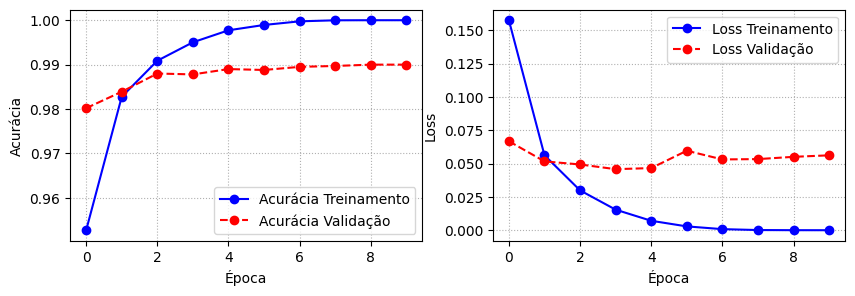

In [18]:
plot_resultados_modelo(history_m4)

# Dropout
As camadas de dropout têm sido o método ideal para reduzir o overfitting de redes neurais

<p align="center">
<img src="https://www.tech-quantum.com/wp-content/uploads/2018/11/1_iWQzxhVlvadk6VAJjsgXgg1.png" alt= “” width="400" height="value">
</p>

In [19]:
modelo_5 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28,28,1)),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [20]:
history_m5 = modelo_5.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 72s - loss: 0.2049 - accuracy: 0.9399 - val_loss: 0.0675 - val_accuracy: 0.9784 - lr: 0.0100 - 72s/epoch - 77ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 72s - loss: 0.0874 - accuracy: 0.9749 - val_loss: 0.0588 - val_accuracy: 0.9832 - lr: 0.0067 - 72s/epoch - 77ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 70s - loss: 0.0557 - accuracy: 0.9835 - val_loss: 0.0416 - val_accuracy: 0.9873 - lr: 0.0044 - 70s/epoch - 74ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 72s - loss: 0.0382 - accuracy: 0.9884 - val_loss: 0.0450 - val_accuracy: 0.9878 - lr: 0.0030 - 72s/epoch - 77ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 72s - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0442 - 

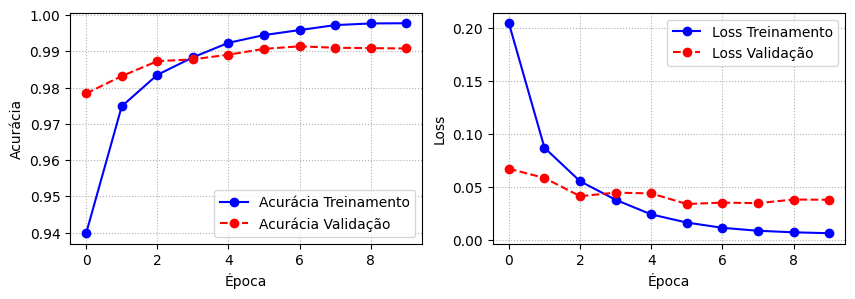

In [21]:
plot_resultados_modelo(history_m5)

# Batch Normalization

A idéia do Batch Normalization é normalizar a saída das ativações entre cada camada da rede neural. Isso 'redefine' efetivamente a distribuição da saída da camada anterior para ser processada com mais eficiência pela camada subsequente.

<p align="center">
<img src="https://images.deepai.org/glossary-terms/981e1ffea3814ae193c27461253faf63/batch_normalization.png" alt= “” width="400" height="value">
</p>



In [22]:
modelo_6 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28, 28, 1)),

      tf.keras.layers.Conv2D(kernel_size=3, filters=12, use_bias=False, padding='same'),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Conv2D(kernel_size=6, filters=24, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Conv2D(kernel_size=6, filters=32, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(200, use_bias=False),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [23]:
history_m6 = modelo_6.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 92s - loss: 0.1170 - accuracy: 0.9644 - val_loss: 0.0409 - val_accuracy: 0.9880 - lr: 0.0100 - 92s/epoch - 98ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 88s - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0501 - val_accuracy: 0.9866 - lr: 0.0067 - 88s/epoch - 94ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 86s - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0277 - val_accuracy: 0.9918 - lr: 0.0044 - 86s/epoch - 92ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 88s - loss: 0.0184 - accuracy: 0.9945 - val_loss: 0.0208 - val_accuracy: 0.9939 - lr: 0.0030 - 88s/epoch - 94ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 87s - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0257 - 

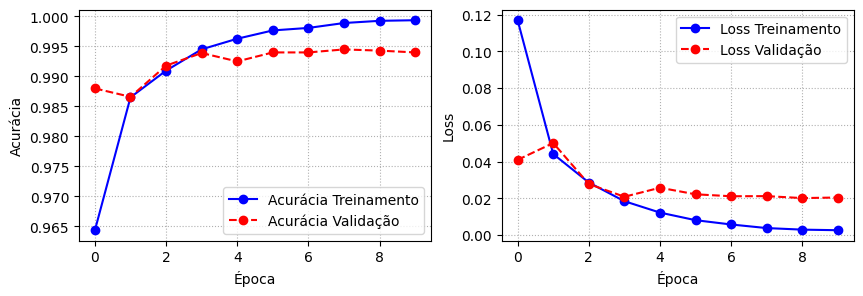

In [24]:
plot_resultados_modelo(history_m6)

# Visualizando Resultados

In [25]:
lista_modelos = [modelo_1, modelo_2, modelo_3, modelo_4, modelo_5, modelo_6]

## Realizando Predições Dados de Teste

In [26]:
import numpy as np

lista_results = []

for modelo in lista_modelos:
  results  = modelo.predict(x_test)
  results  = np.argmax(results, axis=1)

  lista_results.append(results)

313/313 [==============================] - 4s 12ms/step


## Matriz de Confusão

In [27]:
import sklearn
from sklearn.metrics import confusion_matrix

lista_cms = []

for resultado in lista_results:
  cm = confusion_matrix(
          y_test, resultado, labels=np.arange(10),
      )
  lista_cms.append(cm)

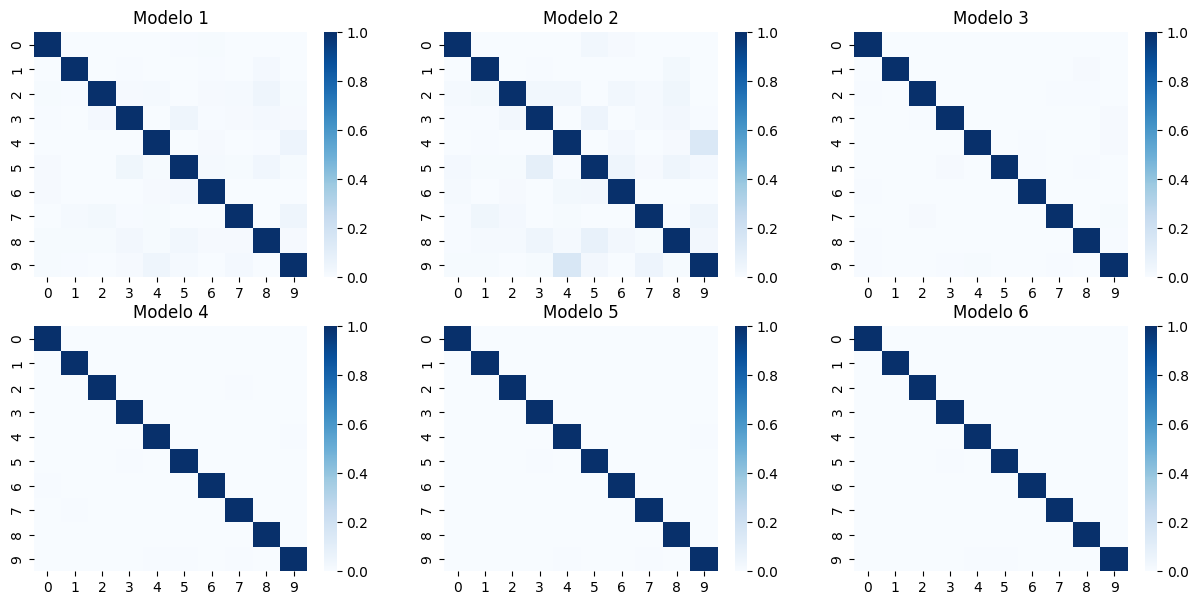

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
ax = ax.flatten()

for i in range(6):
  cm_norm = sklearn.preprocessing.MinMaxScaler().fit_transform(lista_cms[i])
  sns.heatmap(cm_norm, cmap='Blues', ax=ax[i]);
  ax[i].set_title(f'Modelo {i + 1}')

## Gráfico de Barras

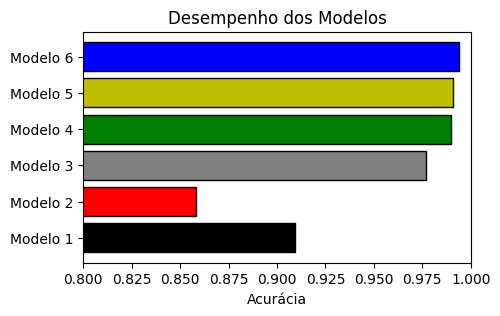

In [29]:
from sklearn.metrics import accuracy_score

lista_accs = []

fig, ax = plt.subplots(figsize=(5, 3))

for resultado in lista_results:
  acc = accuracy_score(resultado, y_test)
  lista_accs.append(acc)

ax.barh(range(6), width=lista_accs, color=['k', 'r', 'gray', 'g', 'y', 'b'], ec='k')
ax.set_yticks([0, 1, 2, 3, 4, 5], ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5', 'Modelo 6']);
ax.set_xlim(0.8, 1)
ax.set_xlabel('Acurácia')
ax.set_title('Desempenho dos Modelos');
